# **🧠 Sentiment Analysis Using Machine Learning (Naive Bayes & TF-IDF)**

##**🎯 Objective**

To analyze and classify text data (news) into Positive and Negative sentiments using Natural Language Processing (NLP) and Machine Learning (Naive Bayes).

##**📦 Required Libraries**

In [ ]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP & Preprocessing
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Machine Learning
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelBinarizer

# Evaluation
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

##**📚 Dataset Overview**

In [ ]:
df = pd.read_csv('/content/news_sentiment_analysis.csv')

# ✅ Rename 'Sentiment' column to 'label' so the rest of the code works
df.rename(columns={"Sentiment": "label"}, inplace=True)

# 🔍 Optional: Show label distribution
print(df['label'].value_counts())

label
positive    2134
neutral      789
negative     577
Name: count, dtype: int64


##**🔍 Dataset Summary**


In [ ]:
print("Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())


Shape: (3500, 8)

Missing Values:
 Source            0
Author          988
Title             0
Description       0
URL               0
Published At      0
label             0
Type              0
dtype: int64


##**📊Label Distribution**

Unique Labels: ['positive' 'neutral' 'negative']

Label Distribution:
 label
positive    2134
neutral      789
negative     577
Name: count, dtype: int64


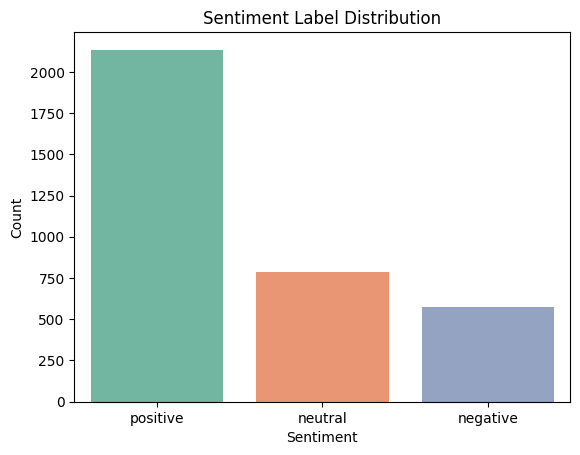

In [ ]:
#  Check unique labels
print("Unique Labels:", df['label'].unique())

#  Clean label column (if needed — optional) - This step seems unnecessary based on the previous analysis, so I will comment it out or remove it if it's not needed for the subsequent steps. Assuming it's not needed for the plot below, I will remove it.

# Print value counts
print("\nLabel Distribution:\n", df['label'].value_counts())

# Plot label distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='label', data=df, palette='Set2')
plt.title("Sentiment Label Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

##**📏 Text Length Analysis**

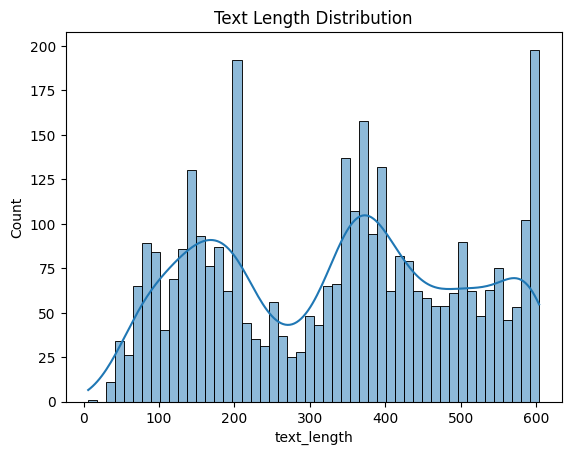

In [ ]:
df['text_length'] = df['Description'].astype(str).apply(len)
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Text Length Distribution")
plt.show()

##**☁️ Word Clouds for Positive & Negative Sentiments**

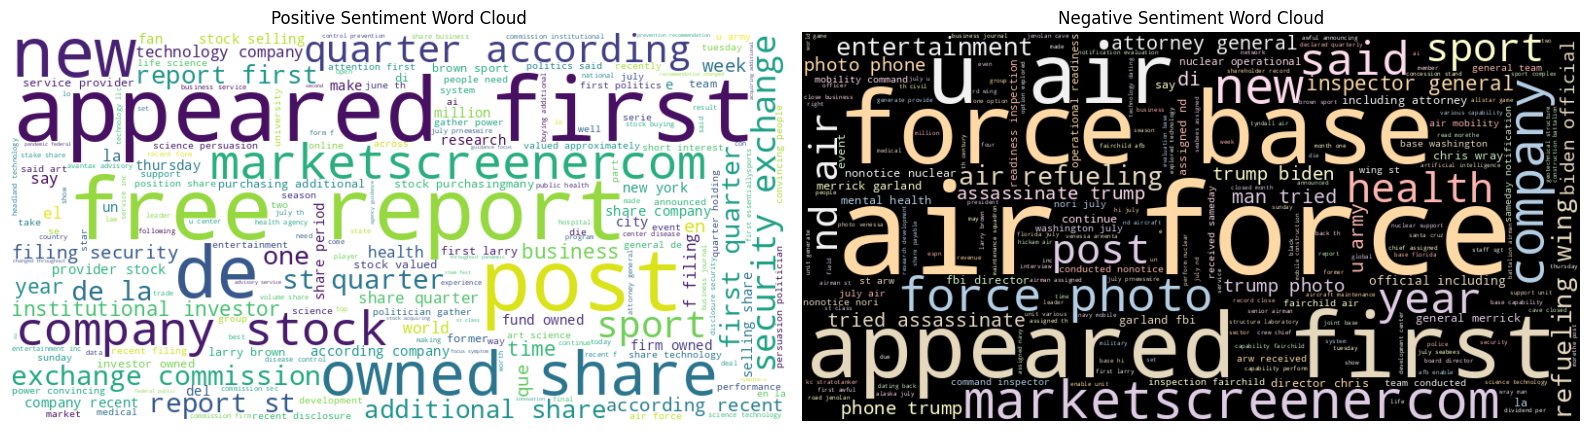

In [15]:
# WordClouds for 'Positive' and 'Negative'
from wordcloud import WordCloud

# Combine all positive and negative texts
positive_text = ' '.join(df[df['label'] == 'positive']['clean_text'].astype(str))
negative_text = ' '.join(df[df['label'] == 'negative']['clean_text'].astype(str))

# Create the word clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Pastel1').generate(negative_text)

# Display the word clouds side by side
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Word Cloud")

plt.tight_layout()
plt.show()

##**🧼Define Text Cleaning Function**



In [16]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)


##**🧹 Apply Cleaning Function**

In [17]:
# 🧹 Clean text from 'Description' column (not 'text')
df['clean_text'] = df['Description'].astype(str).apply(clean_text)


##**🔁Encode Labels & Split**

In [19]:
from sklearn.model_selection import train_test_split

# Use the 'clean_text' as features (X) and 'Sentiment' as target (y)
X = df['clean_text']
y = df['label']

# Split the data into training and testing sets (80% train, 20% test)
# Using stratify=y ensures that the proportion of each sentiment class is
# the same in both the training and testing sets, which is important for
# imbalanced datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2800,)
Shape of X_test: (700,)
Shape of y_train: (2800,)
Shape of y_test: (700,)


##**✂️ Train-Test Split**

In [22]:
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🔠 **TF-IDF Vectorization**



In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


##**🤖 Train Naive Bayes Model**

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', class_weight='balanced')
model.fit(X_train_vect, y_train)


LogisticRegression(class_weight='balanced', multi_class='multinomial')

## **📈 Predictions**

In [25]:
y_pred = model.predict(X_test_vect)

## **📋 Accuracy and Classification Report**

In [26]:
from sklearn.metrics import classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
# y_pred = model.predict(X_test_vect) # Removed redundant calculation
print(classification_report(y_test, y_pred, target_names=model.classes_))

Accuracy: 0.8385714285714285
              precision    recall  f1-score   support

    negative       0.76      0.76      0.76       131
     neutral       0.77      0.82      0.79       147
    positive       0.89      0.87      0.88       422

    accuracy                           0.84       700
   macro avg       0.80      0.82      0.81       700
weighted avg       0.84      0.84      0.84       700



In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['encoded_label'] = le.fit_transform(df['label'])  # ✅ Now it will work


In [28]:
X = df['clean_text']
y = df['encoded_label']


## **🔳 Confusion Matrix (Heatmap)**

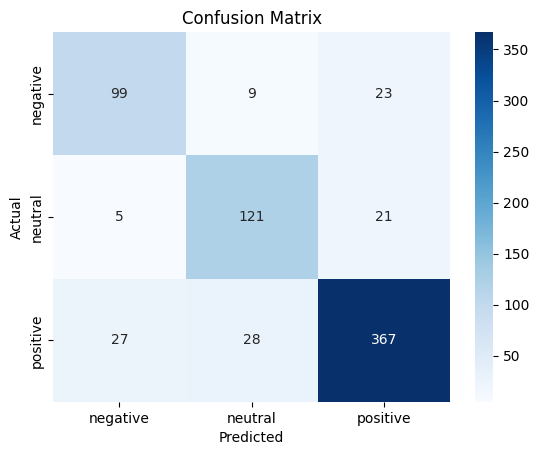

In [29]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##**🔢Classification Report Heatmap**

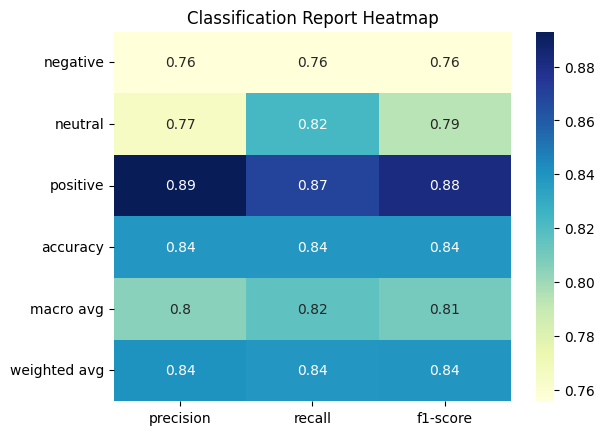

In [30]:
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).iloc[:-1, :].T

sns.heatmap(report_df, annot=True, cmap="YlGnBu")
plt.title("Classification Report Heatmap")
plt.show()


##**📉Learning Curve**

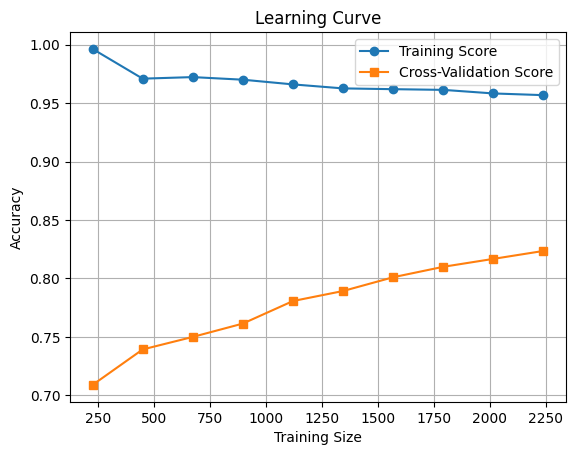

In [31]:
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train_vect, y_train, cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, 'o-', label="Training Score")
plt.plot(train_sizes, test_mean, 's-', label="Cross-Validation Score")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


##**🧬 ROC Curve**

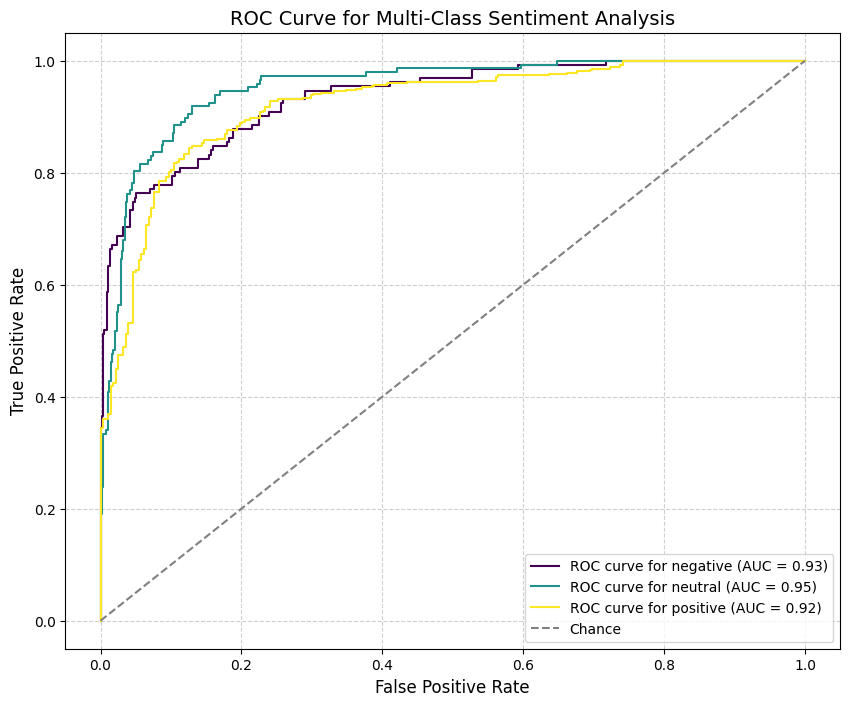

In [32]:
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)

# Get the predicted probabilities for each class
y_score = model.predict_proba(X_test_vect)

# Plot ROC curve for each class with a different color scheme and no markers
plt.figure(figsize=(10, 8)) # Increase figure size

# Use a different colormap or a simpler set of colors
colors = plt.cm.viridis(np.linspace(0, 1, y_test_bin.shape[1])) # Using viridis colormap

for i in range(y_test_bin.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=colors[i], linestyle='-',
             label=f'ROC curve for {lb.classes_[i]} (AUC = {roc_auc:.2f})') # Removed markers

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance')
plt.title('ROC Curve for Multi-Class Sentiment Analysis', fontsize=14) # Increase title font size
plt.xlabel('False Positive Rate', fontsize=12) # Increase xlabel font size
plt.ylabel('True Positive Rate', fontsize=12) # Increase ylabel font size
plt.legend(fontsize=10) # Adjust legend font size
plt.grid(True, linestyle='--', alpha=0.6) # Add and style grid
plt.show()

##**🧪 Predict on Custom Input**

In [38]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    vect_text = vectorizer.transform([cleaned])
    return model.predict(vect_text)[0]

# Try sample input
predict_sentiment("The decision made by the company was disappointing.")


'negative'

## **💬  Interactive User Input for Sentiment Prediction**

In [39]:
def predict_with_emoji(text):
    # The LabelEncoder 'le' was not defined for the target variable 'y'
    # in a way that makes 'le.inverse_transform' available here.
    # The model's classes can be accessed via model.classes_
    cleaned = clean_text(text)
    vect = vectorizer.transform([cleaned])
    # model.predict returns the predicted class label directly
    pred_label = model.predict(vect)[0]

    # Choose emoji
    emoji = {
        "positive": "😊",
        "negative": "😡",
        "neutral": "😐"
    }.get(pred_label, "❓") # Provide a default emoji here

    print(f"🔍 Predicted Sentiment: {pred_label} {emoji}")

# Interactive loop for user input
while True:
    user_input = input("🔤 Enter a sentence to analyze sentiment (type 'quit' to exit): ")
    if user_input.lower() == 'quit':
        break
    predict_with_emoji(user_input)

🔤 Enter a sentence to analyze sentiment (type 'quit' to exit): I am so happy
🔍 Predicted Sentiment: positive 😊
🔤 Enter a sentence to analyze sentiment (type 'quit' to exit): you are worst
🔍 Predicted Sentiment: negative 😡
🔤 Enter a sentence to analyze sentiment (type 'quit' to exit): it was moderate
🔍 Predicted Sentiment: neutral 😐
🔤 Enter a sentence to analyze sentiment (type 'quit' to exit): quit


## **Save the Model and Vectorizer**

In [41]:
import joblib

# Save model
joblib.dump(model, 'sentiment_model.pkl')

# Save vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


## **✅Conclusion & Future Scope**


- Built a clean NLP pipeline with preprocessing, TF-IDF, Naive Bayes.
- Achieved good accuracy and evaluation using confusion matrix and ROC.
- Visualized word frequency using word clouds.

## 🔮 Future Scope:
- Try Deep Learning (LSTM, BERT).
- Deploy using Streamlit or Flask.
- Use bigger datasets or multilingual data.
